# 朴素贝叶斯模型原理介绍

## 贝叶斯公式

贝叶斯公式（Bayes theorem）是概率论中描述随机事件条件概率的一个重要定理。它提供了一种计算给定事件发生的条件下另一个事件发生概率的方法。贝叶斯公式可以表示为：

$$P(A|B) = \frac{P(AB)}{P(B)} = \frac{P(B|A)P(A)}{P(B)}$$
以上公式计算了在已知 B 发生的条件下 A 发生的概率。

其中：
- $P(A|B)$ 是在事件 B 发生的条件下事件 A 发生的条件概率。
- $P(AB)$ 是事件A和B同时发生的概率。
- $P(B|A)$是在事件 A 发生的条件下事件 B 发生的条件概率。
- $P(A)$ 是事件 A 发生的概率（先验概率）。
- $P(B)$是事件 B 发生的概率。

## 朴素贝叶斯原理介绍

**朴素贝叶斯（Naive Bayes, NB）**是一种基于贝叶斯公式的概率分类模型，其核心思想是：
- 假设特征之间是条件独立的（即某个特征的存在与否，不影响其他特征）。
- 通过计算类别$y_k$在给定特征$X$下的 后验概率$P(y_k | X)$，选择概率最大的类别作为预测结果。

具体来说，根据贝叶斯公式：
$$P(y_k | X) = \frac{P(X | y_k) P(y_k)}{P(X)}$$
其中：
- $P(y_k | X)$ ：给定特征$X$后，类别$y_k$的后验概率
- $P(X | y_k)$：类别$y_k$下，特征$X$出现的似然度
- $P(y_k)$：类别$y_k$出现的先验概率
- $P(X)$：所有特征$X$共同出现的概率（归一化常数）

由于朴素贝叶斯假设特征独立，可以将联合概率分解：
$$P(X | y_k) = P(x_1 | y_k) P(x_2 | y_k) P(x_3 | y_k) ... P(x_n | y_k)$$
于是代入得：
$$P(y_k | X) = \frac{P(y_k) \prod_{i=1}^{n} P(x_i | y_k)}{P(X)}$$
最终，选择具有最大$P(y_k | X)$的类别$y_k$作为预测结果。

## 朴素贝叶斯手算案例

### 案例

某个公司正在招聘程序员，候选人提交了简历，公司根据“是否会 Python”和“是否有工作经验”来判断候选人是否能被录取，以下是既往录取情况。

| 录取 (Y) | 会 Python (P) | 有经验 (E) | 概率 |
|----------|---------------|-------------|------|
| 是 (Y=1) | 是 (P=1)      | 是 (E=1)    | 0.30 |
| 是 (Y=1) | 是 (P=1)      | 否 (E=0)    | 0.20 |
| 是 (Y=1) | 否 (P=0)      | 是 (E=1)    | 0.10 |
| 是 (Y=1) | 否 (P=0)      | 否 (E=0)    | 0.05 |
| 否 (Y=0) | 是 (P=1)      | 是 (E=1)    | 0.10 |
| 否 (Y=0) | 是 (P=1)      | 否 (E=0)    | 0.10 |
| 否 (Y=0) | 否 (P=0)      | 是 (E=1)    | 0.10 |
| 否 (Y=0) | 否 (P=0)      | 否 (E=0)    | 0.05 |

请计算一下一个会Python且有工作经验的候选人被录取的概率？

### 解答

问题是要求一个会 Python 且有工作经验的候选人被录取的概率，也即求解$P(Y=1 | P=1, E=1)$

#### 第一步：计算先验概率

先验概率$P(Y)$也即录取比例$P(Y=1)$、未录取比例$P(Y=0)$

\begin{aligned}
P(Y=1) &= P(Y=1, P=1, E=1) + P(Y=1, P=1, E=0) \\
&\quad + P(Y=1, P=0, E=1) + P(Y=1, P=0, E=0) \\
&= 0.30 + 0.20 + 0.10 + 0.05 \\
&= 0.65
\end{aligned}

$$P(Y=0) = 1 - P(Y=1) = 1 - 0.65 = 0.35$$


#### 第二步：计算条件概率

条件概率$P(P=1 | Y=1)$表示录取的情况下，会Python的概率
$$P(P=1 | Y=1) = \frac{P(Y=1, P=1)}{P(Y=1)} = \frac{P(Y=1, P=1, E=1) + P(Y=1, P=1, E=0)}{P(Y=1)} = \frac{0.30 + 0.20}{0.65} = \frac{0.50}{0.65} \approx 0.769$$

条件概率$P(E=1 | Y=1)$表示录取的情况下，有工作经验的概率
$$P(E=1 | Y=1) = \frac{P(Y=1, E=1)}{P(Y=1)}= \frac{P(Y=1, P=1, E=1) + P(Y=1, P=0, E=1)}{P(Y=1)}= \frac{0.30 + 0.10}{0.65} = \frac{0.40}{0.65} \approx 0.615$$

条件概率$P(P=1 | Y=0)$表示未录取的情况下，会Python的概率
$$P(P=1 | Y=0) = \frac{P(Y=0, P=1)}{P(Y=0)} = \frac{P(Y=0, P=1, E=1) + P(Y=0, P=1, E=0)}{P(Y=1)} = \frac{0.10 + 0.10}{0.35} = \frac{0.20}{0.35} \approx 0.571$$

条件概率$P(E=1 | Y=0)$表示未录取的情况下，有工作经验的概率
$$P(E=1 | Y=0) = \frac{P(Y=0, E=1)}{P(Y=0)}= \frac{P(Y=0, P=1, E=1) + P(Y=0, P=0, E=1)}{P(Y=0)}= \frac{0.10 + 0.10}{0.35} = \frac{0.20}{0.35} \approx 0.571$$

#### 第三步：计算后验概率

根据贝叶斯定理
$$P(A|B) = \frac{P(AB)}{P(B)} = \frac{P(B|A)P(A)}{P(B)}$$
可得：
$$P(Y=1 | P=1, E=1) = \frac{P(P=1,E=1 | Y=1)P(Y=1)}{P(P=1, E=1)} = \frac{P(P=1 | Y=1) P(E=1 | Y=1) P(Y=1)}{P(P=1, E=1)}$$

其中分母$P(P=1, E=1)$是所有可能情况的总概率，满足：

\begin{aligned}
P(P=1, E=1) &= P(P=1, E=1, Y=1) + P(P=1, E=1, Y=0) \\
&= P(P=1, E=1 | Y=1) P(Y=1) + P(P=1, E=1 | Y=0) P(Y=0) \\
&= P(P=1|Y=1)P(E=1|Y=1) P(Y=1) \\
&\quad + P(P=1|Y=0)P(E=1|Y=0) P(Y=0) \\
&= (0.769 \times 0.615 \times 0.65) + (0.571 \times 0.571 \times 0.35) \\
&= 0.3076 + 0.1140 \\
&= 0.4216
\end{aligned}


因此，$$P(Y=1 | P=1, E=1) = \frac{0.769 \times 0.615 \times 0.65}{0.4216} = \frac{0.3076}{0.4216} \approx 0.73$$

#### 第四步: 结论

一个会 Python 且有工作经验的候选人被录取的概率，也即$P(Y=1 | P=1, E=1)$为0.73

## 朴素贝叶斯模型优缺点分析

### 朴素贝叶斯优点
- **数学基础扎实：** 朴素贝叶斯模型基于坚实的数学理论，分类效率稳定。
- **对小规模数据表现良好：** 适合于小数据上进行训练。
- **简单直接：** 算法简单，易于解释与理解。

### 朴素贝叶斯缺点
- **独立性假设严格：** 朴素贝叶斯基于严格的独立性假设，也即假设特征之间相互独立，但是实际中特征之间往往互相有关联，并不是相互独立。
- **计算复杂度高：** 对于大规模数据集或高维特征空间，朴素贝叶斯的计算会非常耗时。

# 朴素贝叶斯模型实践

朴素贝叶斯方法本质上是概率分类算法，用于估计类别的后验概率，仅适用于分类问题，不适用于预测连续值的回归问题。

## GaussianNB
无参数

## 泰坦尼克数据集

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

In [5]:
# 导入所需的库
import seaborn as sns  # 用于加载内置数据集
import warnings  # 用于忽略警告信息
warnings.filterwarnings('ignore')  # 忽略警告信息，防止冗长的警告输出
from sklearn.naive_bayes import GaussianNB  # 朴素贝叶斯模型
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc  # 用于计算准确率，混淆矩阵等
import matplotlib.pyplot as plt  # 用于绘制图表
import seaborn as sns  # 用于绘制更美观的图表

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,B,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,C,Cherbourg,yes,True


## 代码实现

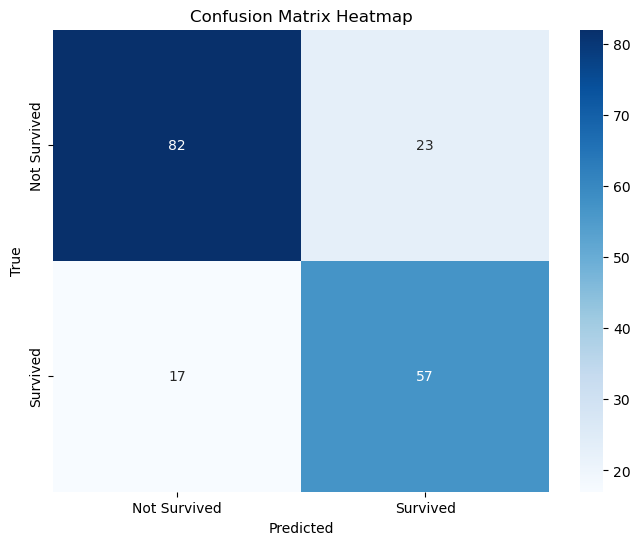

Classification Report:
              precision    recall  f1-score   support

           0     0.8283    0.7810    0.8039       105
           1     0.7125    0.7703    0.7403        74

    accuracy                         0.7765       179
   macro avg     0.7704    0.7756    0.7721       179
weighted avg     0.7804    0.7765    0.7776       179



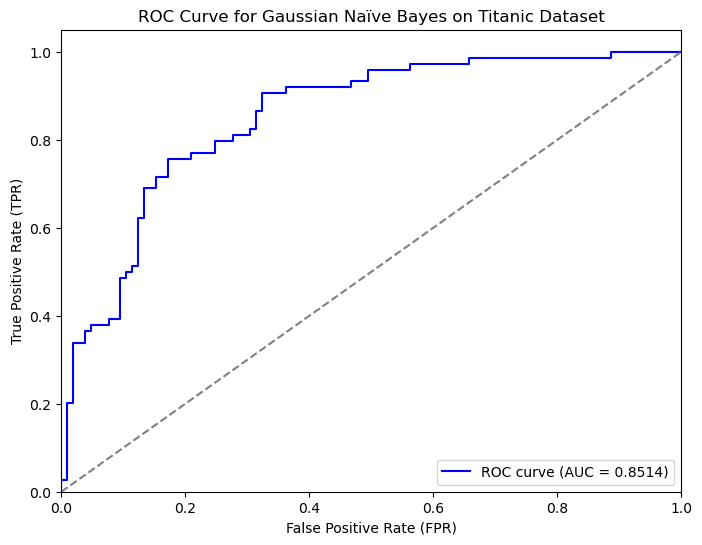

In [6]:
# 选择特征列（X）和目标列（y）
# 特征列： 'pclass'（舱位）, 'sex'（性别）, 'age'（年龄）, 'sibsp'（兄弟姐妹/配偶）, 
#         'parch'（父母/子女）, 'fare'（票价）, 'embarked'（登船港口）
# 目标列： 'survived'（是否生还，0=未生还，1=生还）
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()  # 删除缺失值
y = df['survived']  # 目标变量：生还状态

# 数据集划分：80% 用于训练，20% 用于验证
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练 Gaussian Naïve Bayes 模型
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# 进行预测
y_probs = gnb_model.predict_proba(X_test)[:, 1]  # 获取生还（正类别）的概率
y_pred = gnb_model.predict(X_test)  # 获取分类预测结果

# 计算混淆矩阵（Confusion Matrix）
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵热力图
plt.figure(figsize=(8, 6))  # 设置图像大小
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"], 
            yticklabels=["Not Survived", "Survived"])  # 生成热力图
plt.title("Confusion Matrix Heatmap")  # 设置标题
plt.xlabel('Predicted')  # X 轴标签
plt.ylabel('True')  # Y 轴标签
plt.show()  # 显示图像

# 生成分类报告（包括精确率、召回率、F1 分数等）
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)

# 计算 ROC 曲线（假阳性率和真正率）
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # 计算 AUC（曲线下面积）

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))  # 设置图像大小
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')  # 绘制 ROC 曲线
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 绘制对角线（随机猜测的表现）
plt.xlim([0.0, 1.0])  # 设置 X 轴范围
plt.ylim([0.0, 1.05])  # 设置 Y 轴范围
plt.xlabel('False Positive Rate (FPR)')  # X 轴标签：假阳性率
plt.ylabel('True Positive Rate (TPR)')  # Y 轴标签：真正率
plt.title('ROC Curve for Gaussian Naïve Bayes on Titanic Dataset')  # 设置标题
plt.legend(loc='lower right')  # 添加图例
plt.show()  # 显示图像